# <ins> <center> Clustering 

---

## <ins> <center> Imports </ins>

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import silhouette_score

In [5]:
#importing necessary libraries for Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

---

## <ins> <center> loading data into dataframe

In [63]:
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/top_5_features_clustering.csv")

In [6]:
data = pd.read_csv('top_5_features_clustering.csv')

In [7]:
attributes_df = data.drop('label', axis=1)
labels_df = data['label']

In [8]:
attributes = attributes_df.to_numpy()
labels = labels_df.to_numpy()

---

## <ins> <center> Helper functions

### <ins> 1. print the evaluation metrics for the clustering

In [17]:
def print_metrics(preds):
    print("Extrinsic - V-measure score : ", v_measure_score(labels_df, preds))
    print("Intrinsic - Silhouette score : ", silhouette_score(attributes_df, preds))

### <ins> 2. plot the clusters in 2D - Kmeans

In [128]:
def plot_km(ymeans,cluster_centre,num_clusters):
  cc = cluster_centre
  yy = ymeans
  cc.columns = attributes_df.columns 
  top5 = pd.concat([attributes_df, cc], axis=0) # appending the cluster centers to the top 5 features
  # PCA transform data into 2D
  pca = PCA(n_components=2)
  pca.fit(top5)
  pca_data = pca.transform(top5)

  # pca_clusters are the last 10 rows of pca_data
  pca_centers = pca_data[-num_clusters:]
  # pca_data is the data without the last 10 rows
  pca_x = pca_data[:-num_clusters]

  # plot the clusters with cluster centers
  plt.scatter(pca_x[:,0], pca_x[:,1], c=yy, cmap='jet', s=0.8)
  plt.scatter(pca_centers[:,0], pca_centers[:,1], c='black', s=10, alpha=0.8)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title('Clustering Plot')
  # legends by cluster labels per color. we would have 10 legends, one for each color
  patches_ = []
  for i in range(num_clusters):
    patches_.append(patches.Patch(color=plt.cm.jet(i/num_clusters), label= 'Cluster ' + str(i)))
  plt.legend(handles=patches_, fontsize=8) # set fontsize to 8
  plt.show()
  plt.show()

  print_metrics(yy)

  plt.scatter(pca_x[:,0], pca_x[:,1], c=labels_df, cmap='jet', s=0.8)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title('Ground Truth')
  # legends by cluster labels per color. we would have 10 legends, one for each color
  patches_ = []
  for i in range(10):
    patches_.append(patches.Patch(color=plt.cm.jet(i/10), label= 'Class' + str(i)))
  plt.legend(handles=patches_, fontsize=8) # set fontsize to 8
  plt.show()

### <ins> 3. plot the clusters in 2D - other clustering algorithms

In [15]:
def plot_cluster(cluster_labels, num_clusters):
  CL = cluster_labels

  # PCA transform data into 2D
  pca_ = PCA(n_components=2)
  pca_data_ = pca_.fit_transform(attributes_df)

  # plot the clusters with cluster centers
  plt.scatter(pca_data_[:,0], pca_data_[:,1], c=CL, cmap='jet', s=0.8)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title('Clustering Plot')
  # legends by cluster labels per color. we would have 10 legends, one for each color
  patches_ = []
  for i in range(num_clusters):
    patches_.append(patches.Patch(color=plt.cm.jet(i/num_clusters), label= 'Cluster ' + str(i)))
  plt.legend(handles=patches_, fontsize=8) # set fontsize to 8
  plt.show()

  print_metrics(CL)

  plt.scatter(pca_data_[:,0], pca_data_[:,1], c=labels_df, cmap='jet', s=0.8)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title('Ground Truth')
  # legends by cluster labels per color. we would have 10 legends, one for each color
  patches_ = []
  for i in range(10):
    patches_.append(patches.Patch(color=plt.cm.jet(i/10), label= 'Class' + str(i)))
  plt.legend(handles=patches_, fontsize=8) # set fontsize to 8
  plt.show()

### <ins> 3. plot the clusters in 2D - DBSCAN

In [18]:
def plot_cluster_DBSCAN(cluster_labels, num_clusters):
  CL = cluster_labels

  # PCA transform data into 2D
  pca_ = PCA(n_components=2)
  pca_data_ = pca_.fit_transform(attributes_df)

  # plot the clusters with cluster centers
  plt.scatter(pca_data_[:,0], pca_data_[:,1], c=CL, cmap='jet', s=0.8)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title('Clustering Plot')
  plt.show()

  print_metrics(CL)

  plt.scatter(pca_data_[:,0], pca_data_[:,1], c=labels_df, cmap='jet', s=0.8)
  plt.xlabel('PCA 1')
  plt.ylabel('PCA 2')
  plt.title('Ground Truth')
  # legends by cluster labels per color. we would have 10 legends, one for each color
  patches_ = []
  for i in range(10):
    patches_.append(patches.Patch(color=plt.cm.jet(i/10), label= 'Class' + str(i)))
  plt.legend(handles=patches_, fontsize=8) # set fontsize to 8
  plt.show()

---

## <ins> <center> K-Means Clustering

- We do chose 10 clusters intuitively because we have 10 different classes of traffic signs. 

In [34]:
k = 10 #creating 10 clusters
kmeans = KMeans(n_clusters=k, init= "k-means++", random_state=42).fit(attributes_df)
ymeans = kmeans.predict(attributes_df)
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_)

C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


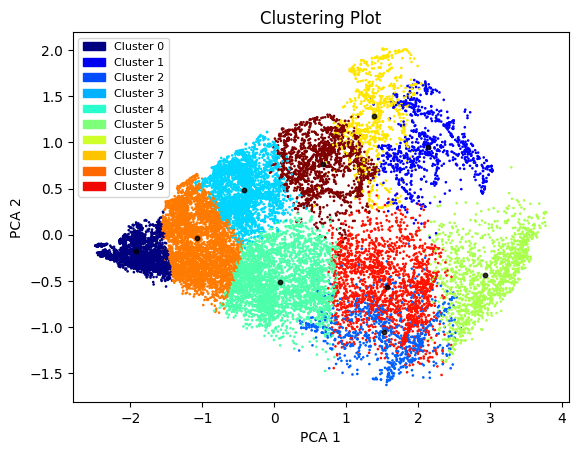

Extrinsic - V-measure score :  0.3306425130423261
Intrinsic - Silhouette score :  0.20415675961123386


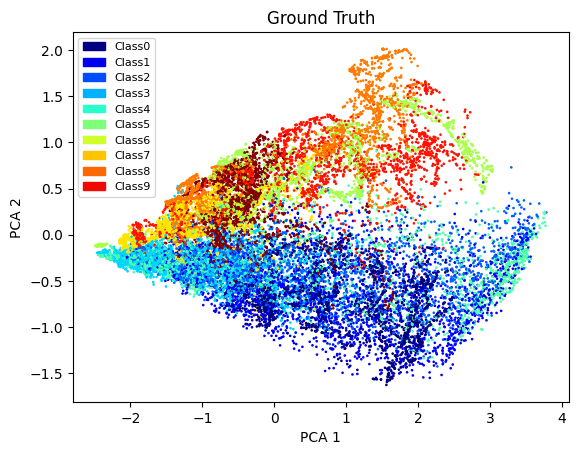

In [125]:
plot_km(ymeans,cluster_centers_df,10)

---

## <ins> <center> Hierarchical Agglomerative Clustering

In [17]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=k).fit(attributes_df)
hierarchical_clustering_preds = hierarchical_clustering.labels_

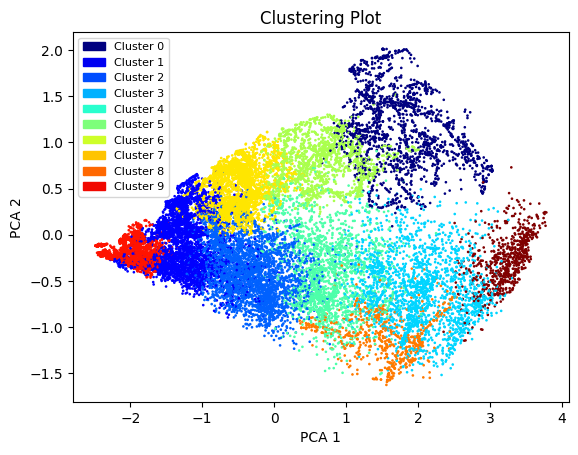

Extrinsic - V-measure score :  0.3263035535573354
Intrinsic - Silhouette score :  0.1601376012085802


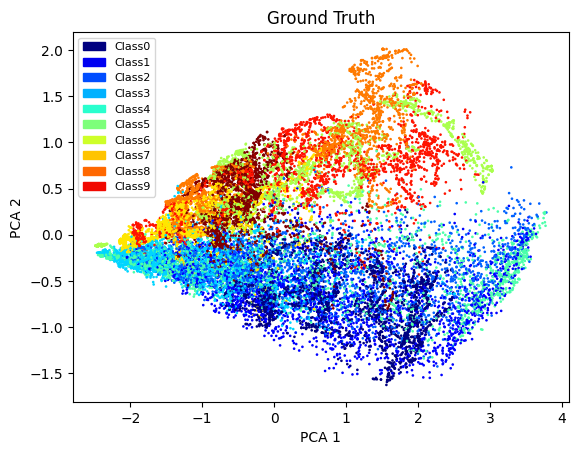

In [120]:
plot_cluster(hierarchical_clustering_preds,10)

### <ins> <center> Dendogram

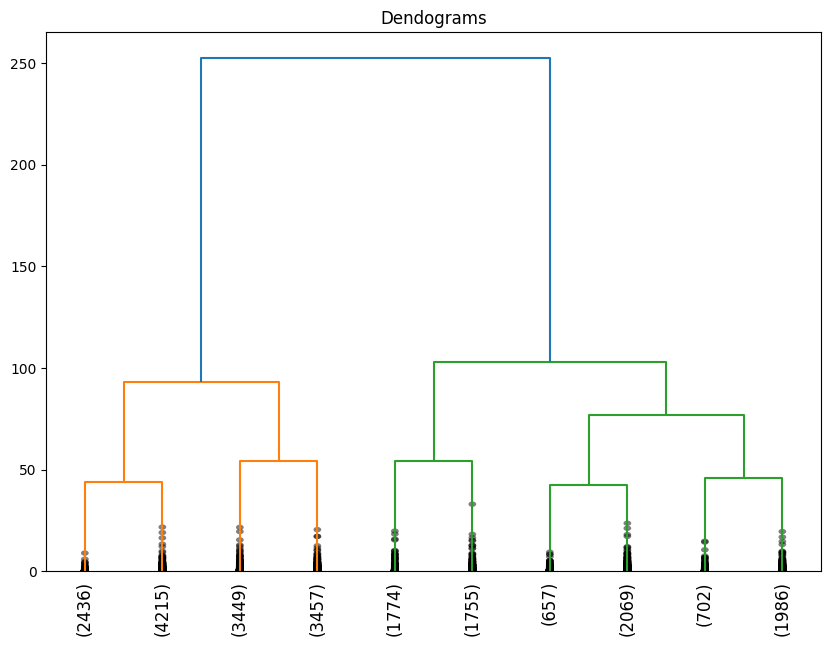

In [62]:
# plotting dendogram for hierarchical clustering uptill 10 clusters
Z = linkage(attributes_df, 'ward')
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

---

## <ins> <center> Gaussian Mixture Models

In [21]:
gmm = GaussianMixture(init_params= "k-means++" , n_components=k, random_state=42).fit(attributes_df)
gmm_preds = gmm.predict(attributes_df)

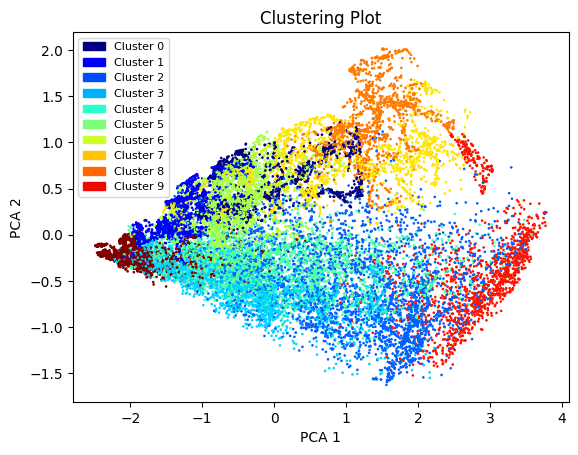

Extrinsic - V-measure score :  0.49012939408299466
Intrinsic - Silhouette score :  0.02522618824657314


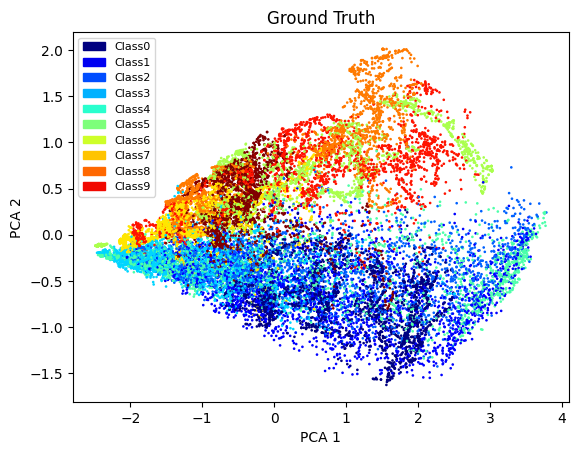

In [121]:
plot_cluster(gmm_preds,10)

---

## <ins> <center> Optimal number of clusters

In [19]:
# v-measure and inertia scores for optimal number of clusters

v_measure= []
inertia = []
fro = 1
till = 100
for i in range(fro,till):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(attributes_df)
    v_measure.append(v_measure_score(labels_df, kmeans.labels_))
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### <ins>  plotting the metrics to carry out elbow method

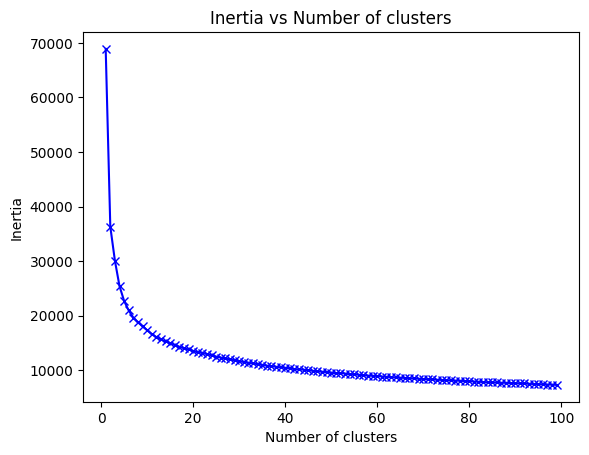

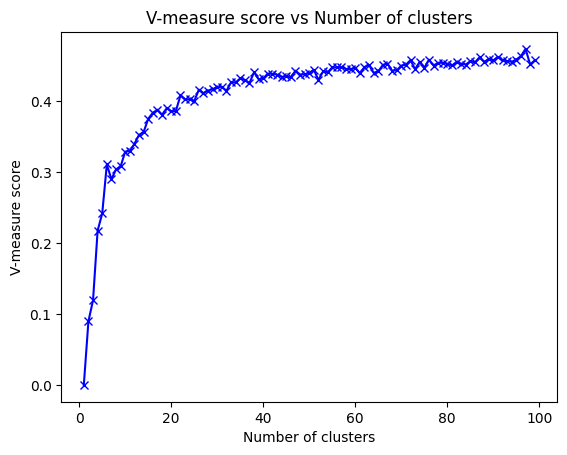

In [20]:
# plot both the metrics
plt.plot(range(fro,till), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters')
plt.show()

# plotting v_measure score
plt.plot(range(fro,till), v_measure, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('V-measure score')
plt.title('V-measure score vs Number of clusters')
plt.show()

- based on the above observations, we see that the optimal number of clusters is 20. beyond that value, the inertia measure does not decrease significantly, and the v-measure score does not increase significantly.

---

# <ins> <center> Training the clustering algorithms on optimal number of clusters

## <ins> K-Means

In [126]:
number_clusters = 20 #creating 20 clusters
kmeans_clusterer = KMeans(n_clusters=number_clusters, init= "k-means++", random_state=42).fit(attributes_df) 
kmeans_predictions = kmeans_clusterer.predict(attributes_df)
cluster_centers_df_optimal = pd.DataFrame(kmeans_clusterer.cluster_centers_)

C:\Users\dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


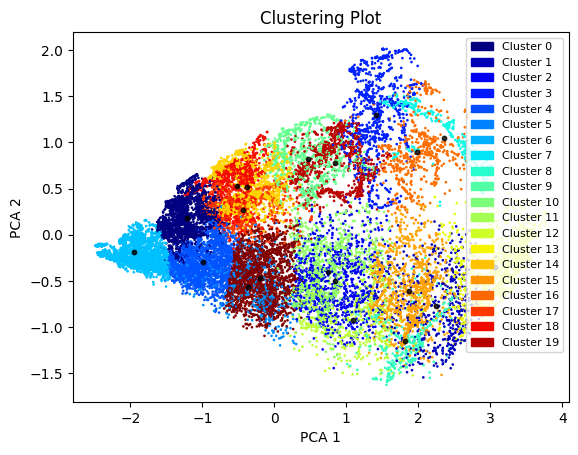

Extrinsic - V-measure score :  0.41020147439186355
Intrinsic - Silhouette score :  0.20398864391478266


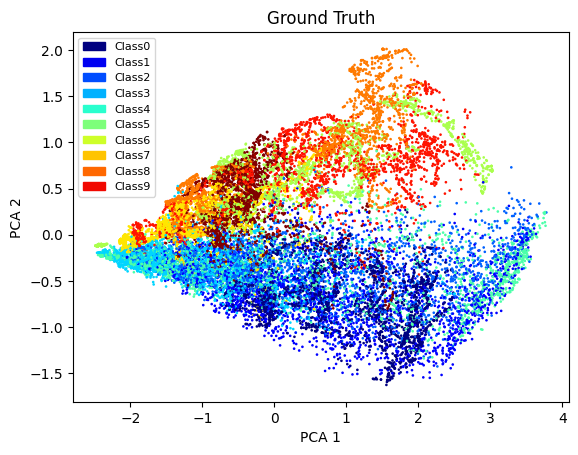

In [127]:
plot_km(kmeans_predictions,cluster_centers_df_optimal,20)

---

## <ins> Hierarchical Agglomerative Clustering

In [52]:
HC_clusterer = AgglomerativeClustering(n_clusters=number_clusters).fit(attributes_df)
HC_predictions = HC_clusterer.labels_

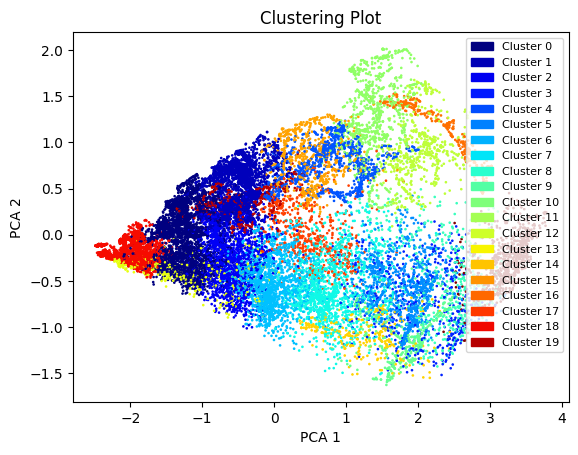

Extrinsic - V-measure score :  0.3905700748487048
Intrinsic - Silhouette score :  0.16996918604372985


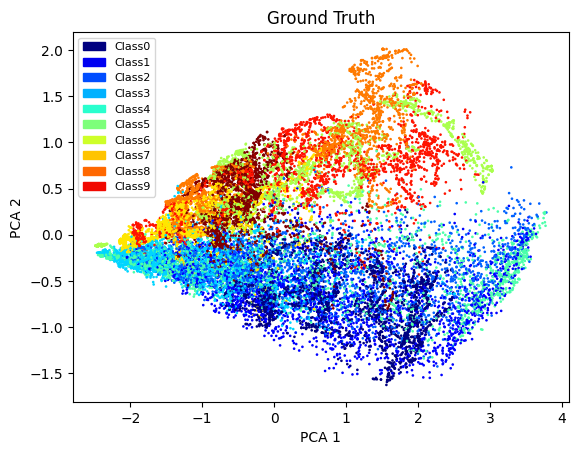

In [122]:
plot_cluster(HC_predictions,20)

### <ins> Dendogram

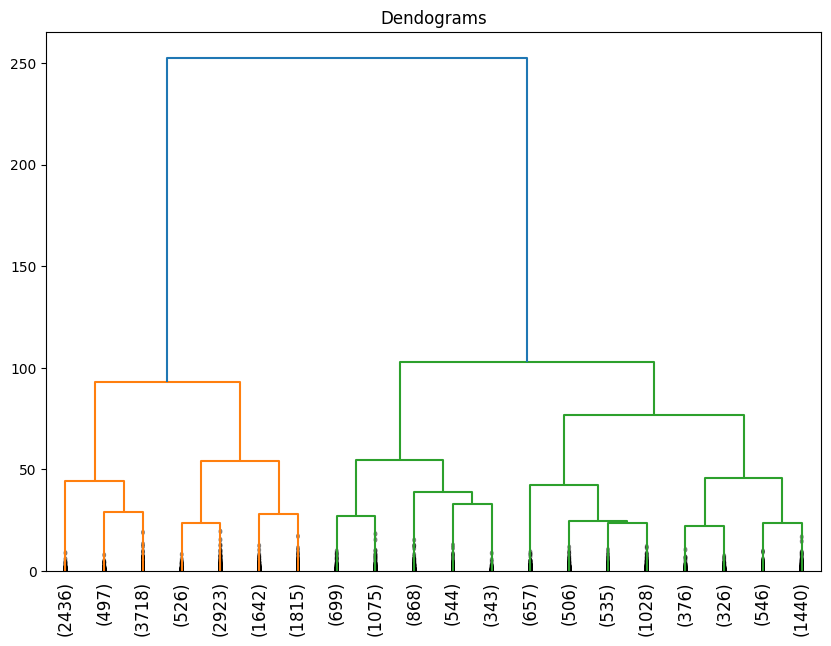

In [54]:
# plotting dendogram for hierarchical clustering uptill 10 clusters
Z = linkage(attributes_df, 'ward')
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()

---

## <ins> <center> GMM

In [55]:
GMM_predictions = GaussianMixture(init_params= "k-means++" , n_components=k, random_state=42).fit_predict(attributes_df)

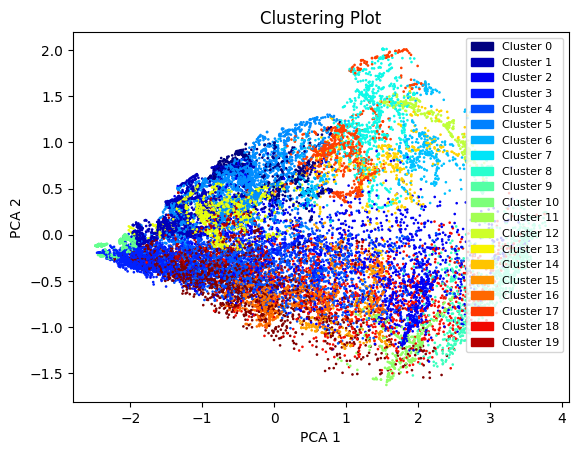

Extrinsic - V-measure score :  0.4746915338908152
Intrinsic - Silhouette score :  0.0033749542550567126


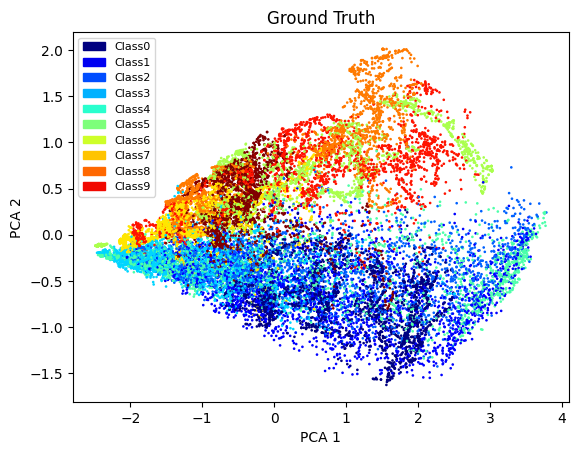

In [123]:
plot_cluster(GMM_predictions,20)

---

## <ins> <center> DBSCAN

- Finding the optimal value of eps and min_samples

In [23]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

# finding the optimal parameters for DBSCAN
eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [2, 3, 4, 5, 6, 7, 8, 9, 10]
v_measures = {}

for e in eps:
    for m in min_samples:
        db = DBSCAN(eps=e, min_samples=m).fit(attributes_df)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        v_measures[(e, m)] = metrics.v_measure_score(labels_df, labels)

best_eps, best_min_samples = max(v_measures, key=v_measures.get)
print("Best eps: ", best_eps, "Best min_samples: ", best_min_samples)

        

Best eps:  0.2 Best min_samples:  2


- number of clusters created by DBSCAN

In [13]:
# DBSCAN with optimal parameters, = 0.2 and 2
db = DBSCAN(eps=0.2, min_samples=2).fit(attributes_df)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("n_clusters: ", n_clusters_)

n_clusters:  1372


- Visualizing the clusters

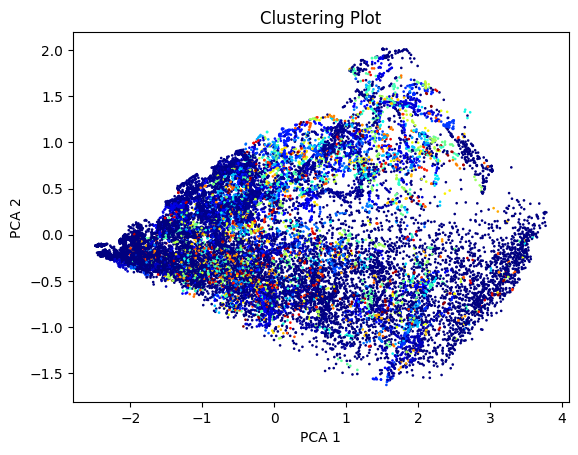

Extrinsic - V-measure score :  0.47791681281047543
Intrinsic - Silhouette score :  -0.17249861579946682


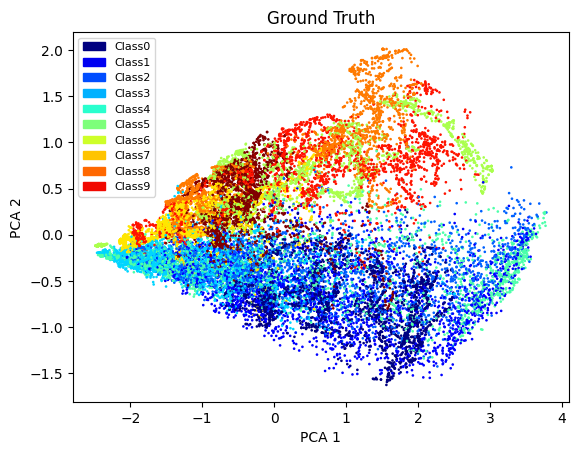

In [20]:
# plotting the clusters
plot_cluster_DBSCAN(labels, n_clusters_)